# Importando pacotes

In [ ]:
from keras.datasets import mnist
from keras import layers
from keras import models
from keras.utils import to_categorical
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from PIL import *
import matplotlib.pyplot as plt

# Lendo os dados e os formatando no formato correto para a rede

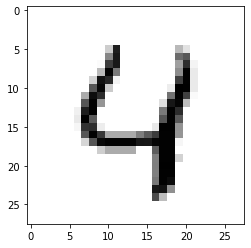

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(test_images[4], cmap = plt.cm.binary)

train_images = np.expand_dims(train_images, axis = 3)/255
test_images = np.expand_dims(test_images, axis = 3)/255

# Rede convolucional

Rede neural convolucional para resolver esse problema.

In [ ]:
network = models.Sequential([
                  Conv2D(64, 3, input_shape = (28, 28, 1)),
                  Conv2D(32, 3),
                  MaxPooling2D(pool_size = 2),
                  Dropout(0.4),
                  Conv2D(32, 3),
                  MaxPooling2D(pool_size = 2),
                  Dropout(0.3),
                  Flatten(),
                  Dense(128, activation = 'relu'),
                  Dense(64, activation = 'relu'),
                  #Dropout(0.2),
                  Dense(10, activation = 'softmax'),
                             ])

In [ ]:
network.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
network.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 6, batch_size = 32)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1964 - accuracy: 0.9373
Epoch 2/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0816 - accuracy: 0.9748
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0629 - accuracy: 0.9802
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0562 - accuracy: 0.9823
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0486 - accuracy: 0.9845
Epoch 6/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0454 - accuracy: 0.9861


In [ ]:
test_loss, test_acc = network.evaluate(test_images, to_categorical(test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.0297 - accuracy: 0.9904


# Importanto uma imagem de teste e a colocando no formato correto

---
Vamos testar se a rede  consegue identificar uma imagem de fora do dataset mnist. A imagem utilizada, mostrada abaixo, tem resolução diferente daquelas presentes no dataset, e também está em outra escala de cores, então precisamos tanto mudar sua resolução quanto sua escala.

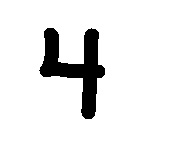

Formato da imagem:  (1, 28, 28, 1)


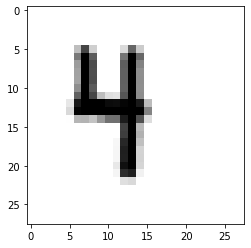

In [ ]:
four = Image.open('four.jpg')

four = four.convert(mode = 'L')

four = four.resize((28,28))
#four = ImageEnhance.Contrast(four).enhance(1.5)

data = np.asarray(four).astype('float64')/255
data = 1 - data

plt.imshow(data, cmap = plt.cm.binary)

data = np.expand_dims(data, axis = (0,3))
print('Formato da imagem: ', data.shape)

# Testando


---
Agora que a imagem está no mesmo esquema que aquelas no dataset, podemos testar.


In [ ]:
print("Valor correto: ", 4)
print('Chute da rede = ', np.argmax(network.predict(data)))

Valor correto:  4
Chute da rede =  4
